### Hello Torch
https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [50]:
import torch
import numpy as np
import pandas as pd

tnn = torch.nn
topt = torch.optim

### Data for training

In [91]:
# sample data
study = np.array([2, 2, 2, 2, 4, 4, 4, 4, 6, 6, 6, 6, 8, 8, 8, 8]) / 24
sleep = np.array([2, 4, 6, 8, 2, 4, 6, 8, 2, 4, 6, 8, 2, 4, 6, 8]) / 24
score = np.array([4, 3, 2, 1, 6, 5, 4, 3, 8, 7, 6, 5, 10, 9, 8, 7]) / 10

### Define network

In [138]:
#input size, hidden-layer size, output size
I, H, O = 2, 3, 1

# input tensors
ip_train = torch.FloatTensor([study, sleep])
op_train = torch.FloatTensor([score])

# define model
model = tnn.Sequential(
    tnn.Linear(I, H),
    tnn.Sigmoid(),
    tnn.Linear(H, O)
)

# define loss calculation method
loss_fn = tnn.MSELoss()

# define solver
optimizer = topt.Adam(model.parameters(), lr=0.01)

### Training loop

0 1.1592581272125244
5 1.0803738832473755
10 1.00176203250885
15 0.9169464111328125
20 0.5593860149383545
25 0.5262845158576965
30 0.4888230860233307
35 0.012821170501410961
40 0.27243033051490784
45 0.28064867854118347
50 0.06239726021885872
55 0.04337381571531296
60 0.2365221232175827
65 0.06330371648073196
70 0.03163981810212135
75 0.007958313450217247
80 0.02421220764517784
85 0.005071666091680527
90 0.000924416002817452
95 0.012087378650903702


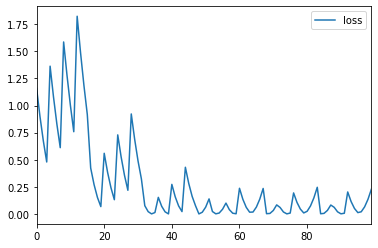

In [139]:
loss_values = []
for t in range(100):
    # forward pass
    op_pred = model(ip_train.transpose(0, 1)[t%16])
    
    # calc loss
    loss = loss_fn(op_pred, op_train.transpose(0, 1)[t%16])
    loss_values.append(loss.item())
    if t%5 == 0:
        print(t, loss.item())
    
    # set grads to 0 before backpropagating
    optimizer.zero_grad()
    
    # back propagate the loss
    loss.backward()
    
    # update params based on grad
    optimizer.step(None)

# plot loss once training complete. ideally loss should reduce to 0.
df = pd.DataFrame({
    'loss': loss_values
})
df.plot()

### Test model

In [141]:
# test it on a single value of study, sleep
test_study = 24 / 24
test_sleep = 1 / 24
test_score = model(torch.as_tensor([test_study, test_sleep])).item()
print(test_score * 10)

6.074168086051941


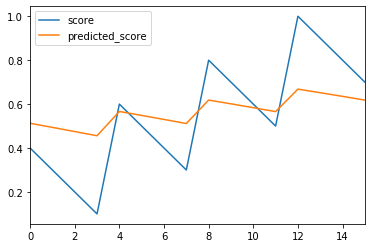

In [142]:
# run it against training data
df = pd.DataFrame({
    'study': study,
    'sleep': sleep,
    'score': score
})

predicted_score = model(torch.FloatTensor(np.array([study, sleep]).T))
df['predicted_score'] = np.array(o.tolist()).T[0]
df.plot(y=['score', 'predicted_score'])